# Aviation Data Analysis Report

## Final Project Submission

Please fill out:
* Student name: Blex 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL: https://medium.com/@olonde.blex/40ce0e157cb9



## DataLoading & minor cleaning

In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Load the aviation data from the CSV file
aviation_df = pd.read_csv('aviation_data_clean.csv')

# Display the first few rows of the dataset
display(aviation_df.head())

# Ensuring 'Event_Date' is in datetime format
aviation_df['Event_Date'] = pd.to_datetime(aviation_df['Event_Date'], errors='coerce')

,Investigation_Type,Event_Date,Location,Country,Aircraft_Damage,Aircraft_Make,Aircraft_Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Flight_Phase,Fatal_Injuries
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,2
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,4
2,Accident,1974-08-30,"Saltville, VA",United States,Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,3
3,Accident,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,2
4,Accident,1981-08-01,"COTTON, MN",United States,Destroyed,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,4


## Results and Recommendations for Aviation Business Stakeholders
This report provides detailed insights and recommendations based on an analysis of aviation accident data.

## Chart 1: Number of Accidents Over Time
**Insight:**
This bar chart illustrates the trend in the number of aviation accidents over the years. It shows a significant number of accidents in the early years, peaking around 1981 and 1982, followed by a gradual decline. This downward trend suggests that safety measures and regulatory practices have improved over time, leading to fewer accidents in more recent years.

**Interpretation:**
The decline in accidents from the 1980s onward can be attributed to advancements in technology, stricter safety protocols, and better training for pilots and maintenance staff. However, the high number of accidents in the past highlights the importance of continually updating safety measures.

C:\Users\USER\AppData\Local\Temp\ipykernel_14288\783280156.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=aviation_df, x='Year', palette='viridis')


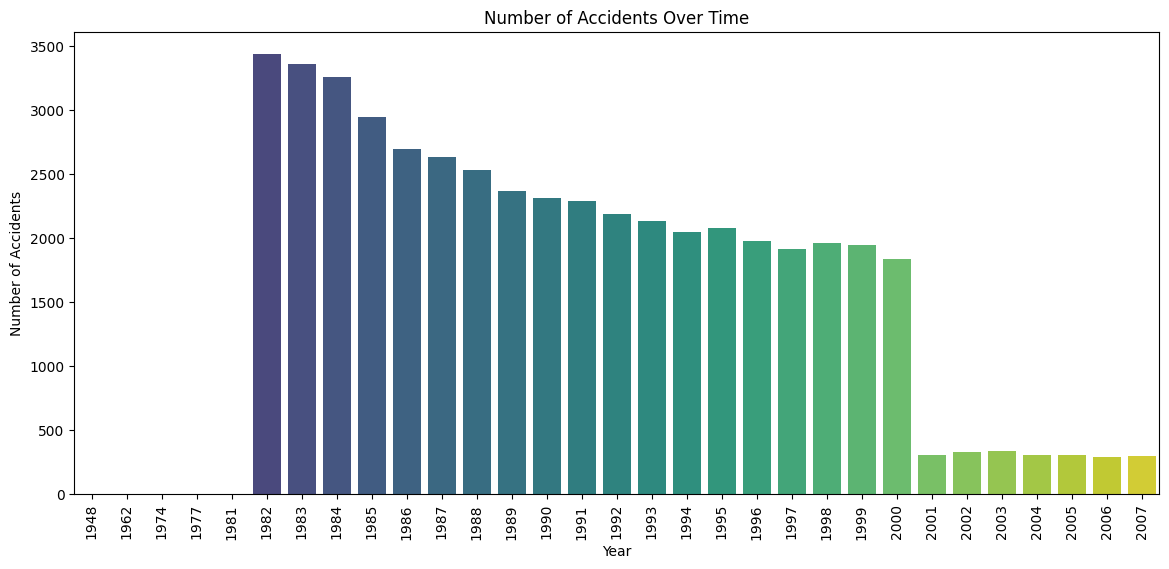

In [2]:
#  Number of accidents over time
aviation_df['Year'] = aviation_df['Event_Date'].dt.year
plt.figure(figsize=(14, 6))
sns.countplot(data=aviation_df, x='Year', palette='viridis')
plt.title('Number of Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()

## Chart 2: Distribution of Injury Counts
**Insight:**
The histograms for injury counts reveal that most accidents result in no or very few injuries. Fatal, serious, and minor injuries are infrequent, while a large proportion of cases report zero uninjured individuals, indicating a higher frequency of incidents where injuries are not severe or absent altogether.

**Interpretation:**
This data suggests that while aviation accidents are serious events, they do not always lead to severe or widespread injuries. However, the potential for fatal outcomes remains a concern, emphasizing the importance of stringent safety checks and emergency response plans.

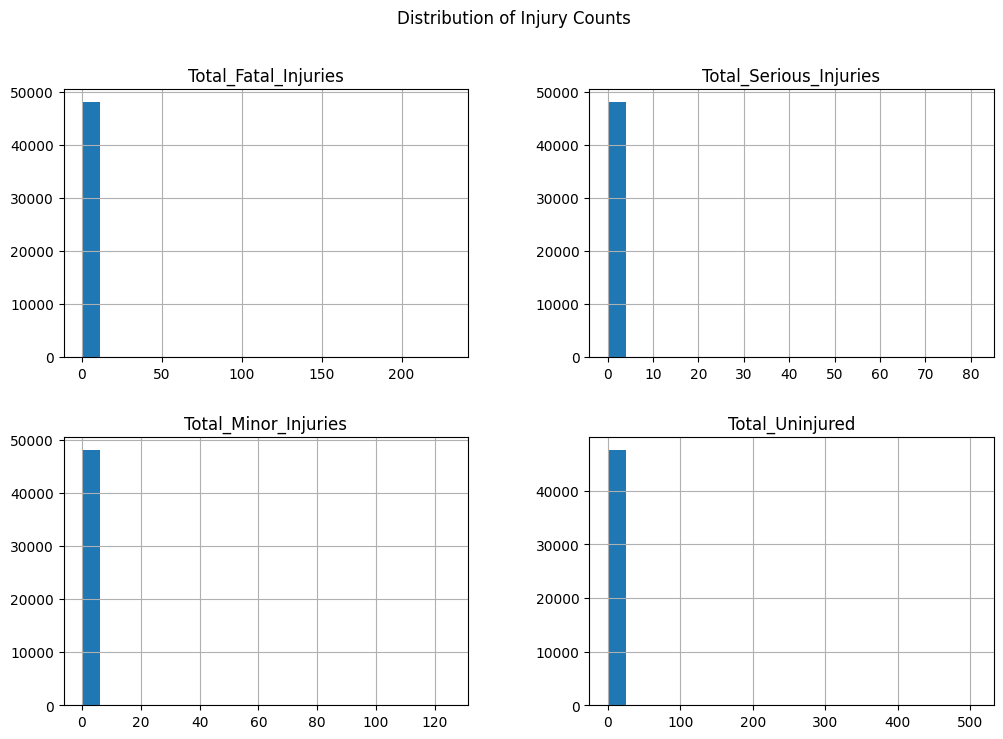

In [3]:
injury_columns = ['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']
aviation_df[injury_columns].hist(bins=20, figsize=(12, 8), layout=(2, 2))
plt.suptitle('Distribution of Injury Counts')
plt.show()


## Chart 3: Accidents by Weather Condition and Flight Phase
**Insight:**
This chart breaks down accidents by the phase of flight and weather conditions. Most accidents occur during visual meteorological conditions (VMC) rather than instrument meteorological conditions (IMC). Accidents are also most common during the landing and takeoff phases, with a substantial number occurring during the approach phase as well. Cruise and taxi phases report fewer accidents, but notable incidents do happen.

**Interpretation:**
The higher number of accidents during takeoff, landing, and approach indicates these are critical moments in flight operations. The fact that most accidents occur under VMC could imply that environmental conditions alone do not fully account for accident risks; operational or human factors may play significant roles.

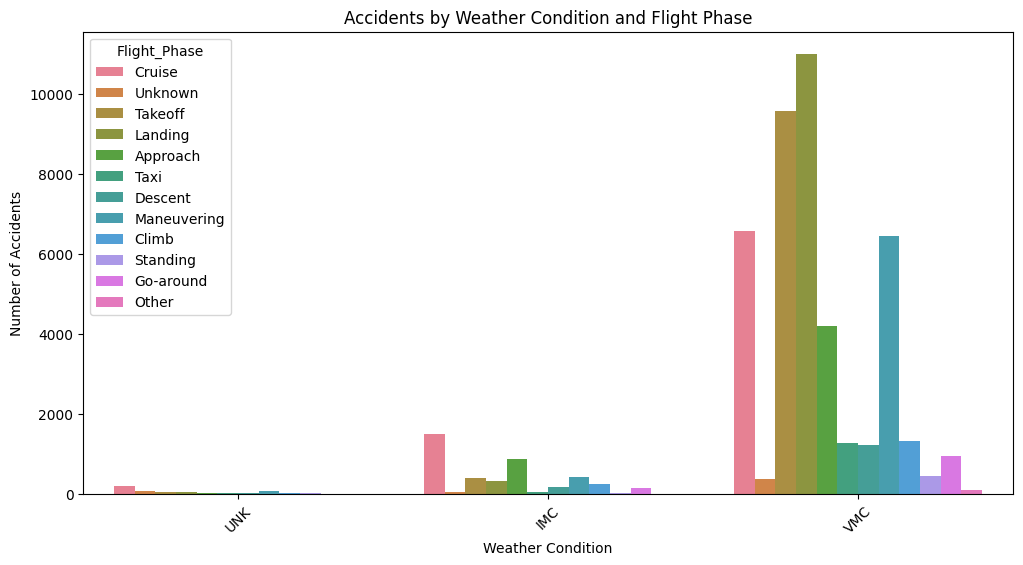

In [4]:
# 3. Accidents by weather condition
plt.figure(figsize=(12, 6))
sns.countplot(data=aviation_df, x='Weather_Condition', hue='Flight_Phase')
plt.title('Accidents by Weather Condition and Flight Phase')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

## Chart 4: Fatal Injuries by Aircraft Make
**Insight:**
This scatter plot displays the total number of fatal injuries associated with various aircraft manufacturers. Notable patterns observed include:
- Boeing and Bell aircraft show some of the highest counts of fatal injuries, indicating that these makes may have been involved in incidents with severe outcomes.
- Other makes, such as Piper, Cessna, and Beech, have lower fatality counts but still demonstrate some instances of fatal injuries.
- Most aircraft makes cluster around the lower end of the fatal injury count, suggesting that many manufacturers have relatively few incidents with fatalities.

**Interpretation:**
The high counts of fatal injuries in certain makes may reflect several factors, such as the aircraft's frequency of use, design, or operational role. For example, Boeing, as a major commercial aircraft manufacturer, has a higher number of flights globally, which may explain the higher count of fatal injuries due to increased exposure.

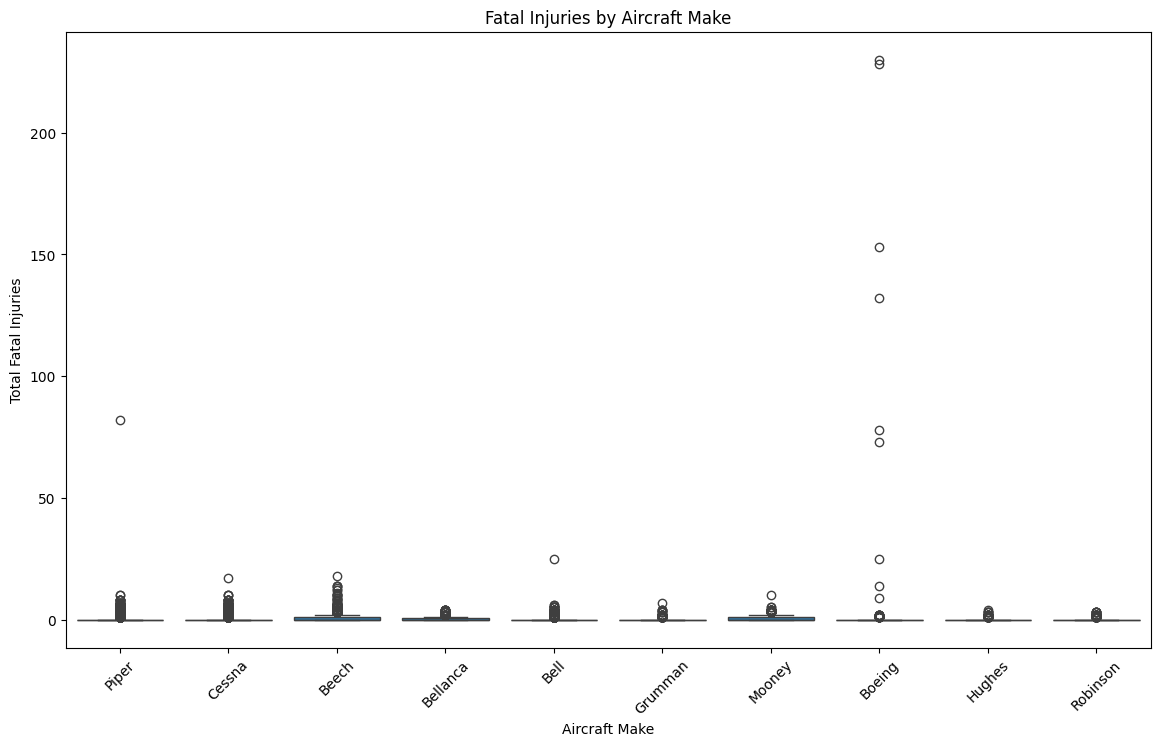

In [5]:
# 4. Fatal injuries by aircraft make
top_makes = aviation_df['Aircraft_Make'].value_counts().head(10).index
plt.figure(figsize=(14, 8))
sns.boxplot(data=aviation_df[aviation_df['Aircraft_Make'].isin(top_makes)], x='Aircraft_Make', y='Total_Fatal_Injuries')
plt.title('Fatal Injuries by Aircraft Make')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.show()

### Recommendations for Stakeholders (Chart 4)
- **Investigate High-Risk Makes**: Prioritize a safety review of aircraft types with higher fatal injuries. Determine if certain models from Boeing and Bell require additional safety protocols or operational guidelines.
- **Safety Enhancements**: If entering the market with any of these makes, consider implementing advanced safety systems and thorough maintenance routines.
- **Comprehensive Training Programs**: Provide targeted training for crew members operating higher-risk aircraft models to reduce the likelihood of fatal outcomes.

## Chart 5: Purpose of Flight vs. Aircraft Damage
**Insight:**
This bar plot breaks down the number of accidents by the purpose of the flight, segmented by the level of aircraft damage (destroyed, substantial, minor). Key insights include:
- Personal Flights have the highest number of accidents, especially with substantial damage.
- Business and Instructional flights also show notable counts of accidents, but at a much lower rate than personal flights.
- Specialized flight purposes, like Aerial Observation and Ferry flights, show lower accident counts but still include instances of substantial damage.

**Interpretation:**
The concentration of accidents within personal flights may point to less rigorous maintenance or flight protocols, or the likelihood of less-experienced pilots in personal aviation. Meanwhile, the variety of damage types across different flight purposes emphasizes that operational context influences risk.

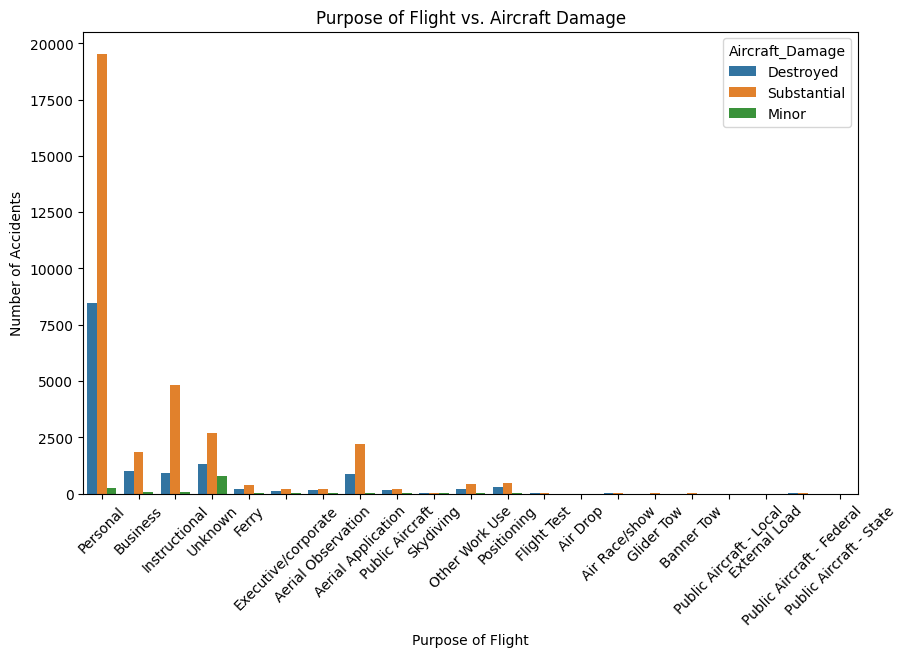

In [6]:
# 5. Purpose of flight analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=aviation_df, x='Purpose_of_Flight', hue='Aircraft_Damage')
plt.title('Purpose of Flight vs. Aircraft Damage')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

### Recommendations for Stakeholders 
- **Focus on Personal Flight Safety**: Enforce strict safety and maintenance standards for private aviation.
- **Enhanced Pilot Training**: Encourage or require enhanced training and certification for pilots conducting personal and instructional flights, as these show higher accident rates.
- **Operational Risk Assessment**: Conduct a risk assessment to identify any common factors or risks associated with specific flight types and establish relevant safety protocols.